In [ ]:
import os 
import sys
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

PATH_TO_DATA = "../InformatiCup2018/Eingabedaten/"
FUEL_FILE = "1.csv"
FUEL_PATH = ("Benzinpreise/" + FUEL_FILE,
             ["Time", "Price"])
ROUTE_PATH = ("Fahrzeugrouten/Bertha Benz Memorial Route.csv",
              ["Time", "Number"])
GAS_STATION_PATH = ("Tankstellen.csv", 
                    ["ID", "Name", "Provider", "Streetname", "Housenumber", "Zipcode", "City", "Longitude", "Latitude"])

def loadData(typeOfData, pathToData=PATH_TO_DATA):
    csv_path = os.path.join(pathToData, typeOfData[0])
    return pd.read_csv(csv_path, delimiter=";", 
                       names = typeOfData[1])

# Gasstations

In [121]:
gasstations = loadData(GAS_STATION_PATH).drop("ID", 1)
routes = loadData(ROUTE_PATH)
fuelPrice = loadData(FUEL_PATH)

In [122]:
gasstations.head(30)

,Name,Provider,Streetname,Housenumber,Zipcode,City,Longitude,Latitude
0,star Tankstelle,STAR,Listlandstrasse,16,25992,List,55.015890,8.429530
1,Esso Tankstelle,ESSO,TRIFT 2,,25980,WESTERLAND,54.907468,8.308741
2,"SYLT, TRIFT",Shell,TRIFT 7,NaN,25980,SYLT,54.904400,8.310700
3,DEXX-Station 188,DEXX,Dorfstr.,19,25927,Aventoft,54.901300,8.822810
4,team Tankautomat Hesbüll,Raiffeisen,Raiffeisenstr.,1,25927,Hesbüll,54.900900,8.810690
5,Aral Tankstelle,ARAL,Keitumer Landstraße,NaN,25980,Sylt-Ost,54.900402,8.339205
6,team Tankautomat Süderlügum,team,Hauptstr.,16,25923,Süderlügum,54.870800,8.906840
7,ELAN Suederluegum,ELAN,HAUPTSTR.,4,25923,SUEDERLUEGUM,54.869200,8.906220
8,OIL! tank & go Automatentankstelle Ladelund,OIL!,Dorfstraße 24,NaN,25926,Ladelund,54.840400,9.027780
9,AVIA Tankstelle,Freie Tankstelle,An der B 5,NaN,25923,Braderup,54.834126,8.889995


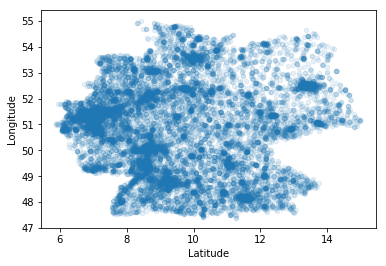

In [123]:
gasstations.plot(kind="scatter", x="Latitude", y="Longitude", alpha=0.1)

In [124]:
gasstations.isnull().any()

Name            True
Provider        True
Streetname      True
Housenumber     True
Zipcode         True
City            True
Longitude      False
Latitude       False
dtype: bool

In [125]:
gasstations[gasstations.isnull().any(axis=1)]

,Name,Provider,Streetname,Housenumber,Zipcode,City,Longitude,Latitude
2,"SYLT, TRIFT",Shell,TRIFT 7,NaN,25980,SYLT,54.904400,8.310700
5,Aral Tankstelle,ARAL,Keitumer Landstraße,NaN,25980,Sylt-Ost,54.900402,8.339205
8,OIL! tank & go Automatentankstelle Ladelund,OIL!,Dorfstraße 24,NaN,25926,Ladelund,54.840400,9.027780
9,AVIA Tankstelle,Freie Tankstelle,An der B 5,NaN,25923,Braderup,54.834126,8.889995
10,OIL! Tankstelle Glücksburg,OIL!,Flensburger Str. 15 B,NaN,24960,Glücksburg,54.827200,9.536720
13,OIL! Tankstelle Flensburg,OIL!,Apenrader Str. 109,NaN,24939,Flensburg,54.808600,9.422040
14,OIL! Tankstelle Flensburg,OIL!,Osterallee 207,NaN,24944,Flensburg,54.803200,9.487980
15,"FLENSBURG, MUERWIKER STR",Shell,MUERWIKER STR. 120,NaN,24943,Flensburg,54.803100,9.456300
17,"FLENSBURG, HARRISLEER STR",Shell,HARRISLEER STR. 98,NaN,24939,Flensburg,54.799100,9.412270
21,WIKING FL-Nord,WIKING,Neustadt 14,NaN,24939,Flensburg,54.796690,9.429070


In [126]:
gasstations[gasstations.isnull()["Name"]]

,Name,Provider,Streetname,Housenumber,Zipcode,City,Longitude,Latitude
1306,NaN,Sprint,NaN,1,17213,Malchow,53.470402,12.44420
1776,NaN,Sprint,NaN,69,17268,Templin,53.112701,13.51400
2622,NaN,Sprint,NaN,51 a,13583,Berlin,52.540001,13.18290
2751,NaN,Sprint,NaN,126/127,10625,Berlin,52.505901,13.31200
3951,NaN,FELTA,Haller Str.,2,49201,Dissen,52.113400,8.20911


In [127]:
mask = gasstations.isnull().Name
gasstations.loc[mask, "Name"] = gasstations[gasstations.isnull()["Name"]]["Provider"] + " Tankstelle"

In [128]:
gasstations.loc[1306, : ]

Name           Sprint Tankstelle
Provider                  Sprint
Streetname                   NaN
Housenumber                    1
Zipcode                    17213
City                     Malchow
Longitude                53.4704
Latitude                 12.4442
Name: 1306, dtype: object

In [129]:
gasstations[gasstations.isnull()["Streetname"]]

,Name,Provider,Streetname,Housenumber,Zipcode,City,Longitude,Latitude
1306,Sprint Tankstelle,Sprint,NaN,1,17213,Malchow,53.470402,12.444200
1776,Sprint Tankstelle,Sprint,NaN,69,17268,Templin,53.112701,13.514000
2622,Sprint Tankstelle,Sprint,NaN,51 a,13583,Berlin,52.540001,13.182900
2751,Sprint Tankstelle,Sprint,NaN,126/127,10625,Berlin,52.505901,13.312000
4284,Dörge Brennstoffe &,Dörge Brennstoffe & Dienstleistungen,NaN,NaN,39397,Schwanebeck,51.960184,11.121097
9335,Leu Energie,Leu Energie,NaN,34,95179,Geroldsgrün,50.340000,11.593000
11896,Landau,AUTO ZOTZ Landau in der Pfalz Tanken und was...,NaN,NaN,NaN,NaN,49.207778,8.135870
12035,Auto Zotz TK Herxheim,AUTO ZOTZ Herxheim b.LD. Tanken an L.493,NaN,NaN,NaN,NaN,49.150275,8.232815


In [130]:
gasstations.loc[1306, "Streetname"] = u"Bundesstraße 192"
gasstations.loc[1776, "Streetname"] = u"Feldstraße"
gasstations.loc[2622, "Streetname"] = u"An der Kappe"
gasstations.loc[2751, "Streetname"] = u"Kantstraße"
gasstations.loc[4284, "Streetname"] = u"Westfeld"
gasstations.loc[9335, "Streetname"] = u"Keyßerstraße"
gasstations.loc[11896, "Streetname"] = u"Horstring"
gasstations.loc[12035, "Streetname"] = u"Untere Hauptstraße"

In [131]:
gasstations[gasstations.isnull()["City"]]

,Name,Provider,Streetname,Housenumber,Zipcode,City,Longitude,Latitude
6346,bft Grefrath,bft,Mülhausener Str.,3,47929,NaN,51.337600,6.344160
11896,Landau,AUTO ZOTZ Landau in der Pfalz Tanken und was...,Horstring,NaN,NaN,NaN,49.207778,8.135870
12035,Auto Zotz TK Herxheim,AUTO ZOTZ Herxheim b.LD. Tanken an L.493,Untere Hauptstraße,NaN,NaN,NaN,49.150275,8.232815


In [132]:
gasstations[gasstations.isnull()["Zipcode"]]

,Name,Provider,Streetname,Housenumber,Zipcode,City,Longitude,Latitude
7210,Raiffeisen Listerscheid,Raiffeisen,Ihnestraße,131,NaN,Attendorn,51.107857,7.848591
8637,bft Tankstelle,BFT Tankstelle,Weilburger Str.,17,NaN,Breitscheid-Rabenscheid,50.681303,8.148122
11896,Landau,AUTO ZOTZ Landau in der Pfalz Tanken und was...,Horstring,NaN,NaN,NaN,49.207778,8.135870
12035,Auto Zotz TK Herxheim,AUTO ZOTZ Herxheim b.LD. Tanken an L.493,Untere Hauptstraße,NaN,NaN,NaN,49.150275,8.232815


In [133]:
gasstations.loc[6346, "City"] = u"Grefrath"
gasstations.loc[11896, "City"] = u"Landau an der Pfalz"
gasstations.loc[12035, "City"] = u"Herxheim"


gasstations.loc[7210, "Zipcode"] = 57439
gasstations.loc[8637, "Zipcode"] = 35767
gasstations.loc[11896, "Zipcode"] = 76829
gasstations.loc[12035, "Zipcode"] = 76863

In [134]:
gasstations[gasstations.isnull()["Provider"]]

,Name,Provider,Streetname,Housenumber,Zipcode,City,Longitude,Latitude
60,24h Tankstelle,NaN,Achtern Diek,4,25938,Wyk auf Föhr,54.692398,8.570682
61,Freie Tankstelle Nieblum,NaN,Kertelhein Allee,2,25938,Nieblum /Föhr,54.692244,8.489156
67,OPEL Martensen,NaN,Hauptstraße,1,25862,Goldelund,54.678659,9.108179
118,BFT Peter Goldschmidt Inh. Kirsten Goldschmidt,NaN,Nedderweg.,1,25813,Hussum,54.478590,9.041800
166,OIL! Tankstelle Erhard Kiehl,NaN,Bergstraße,41,23774,Heiligenhafen,54.371987,10.973864
227,Wulff Oil,NaN,Süderende,27,24803,Erfde,54.305279,9.317913
304,Tankstelle Stadtwerke Heide,NaN,Vogelweide,6,25746,Heide,54.184853,9.108153
416,Tank Stop Stegmann,NaN,Sandfuhr,4,17491,Greifswald,54.075546,13.405985
417,Globus Handelshof GmbH & Co. KG Betriebsstaet...,NaN,Globusring,1,18184,Roggentin,54.074920,12.201150
486,Nordoel-Tankstelle Wahlstedt,NaN,Kieler Str.,8,23812,Wahlstedt,53.959850,10.227500


In [135]:
gasstations.loc[gasstations.isnull()["Provider"], "Provider"] = "Selbstständig"

In [137]:
#with open('clean_gasstations.csv', 'a', encoding='utf-8') as f:
#   gasstations.to_csv(f, header=True, encoding="utf-8")

# Routes

In [ ]:
routes.head()